# Bike Sharing Demand(Forecast use of a city bikeshare system)

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRCVBBmEgT5Nx7LWtHKqQaJfhVAzsSmpZHx0UX7MBOG4oKNuaZ_cA3RLlGddvu0-6V6Xvs&usqp=CAU)

# Overview

[check linear regregession questions](https://www.analyticsvidhya.com/blog/2021/06/25-questions-to-test-your-skills-on-linear-regression-algorithm/)


Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

[Kaggle Link](https://www.kaggle.com/c/bike-sharing-demand/overview )

# Architecture

![](https://miro.medium.com/max/2000/1*_5T13K9iecBAtJ73m0ImVw.png)

# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Load Dataset

In [3]:
df = pd.read_csv("Dataset\\hour.csv")
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


# Check the null values

In [4]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
# check the descibe()

In [5]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Data Visualization

- This WIll be help to identify most of Features using EDA
- Exploratory Data Analysis is considered to be the most important step in machine learning modeling because most problems can be solved with the help of good EDA and we can get enormous insights from it.

### check normality

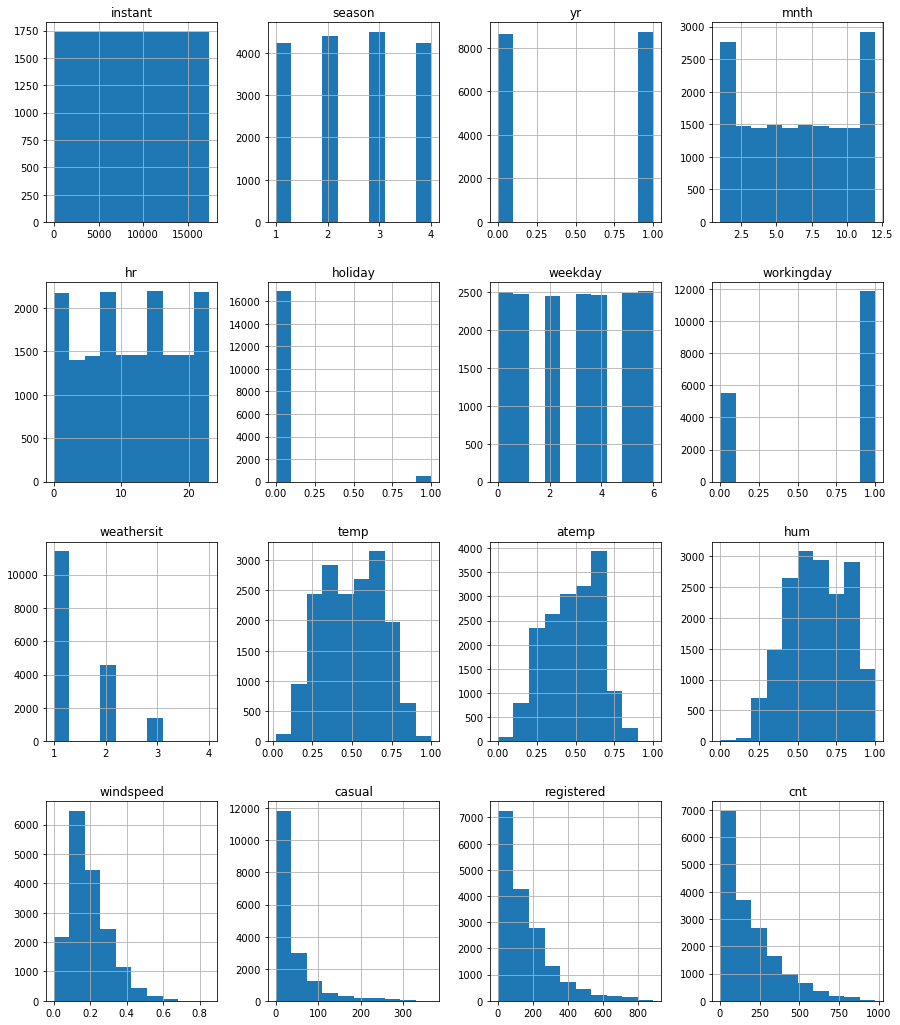

In [4]:
def show_hist(hist_):
    plt.rcParams['figure.figsize'] =15,18
    hist_.hist()

show_hist(df)    

**In this Histogram we can see that most of the variables are not normally distributed, most of the data scientist’s important claim or Assumption will be Normality. Maybe sometimes the Nature of the data may be non-normal at that time we can proceed without Transforming the data.**

[PairPlot link](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

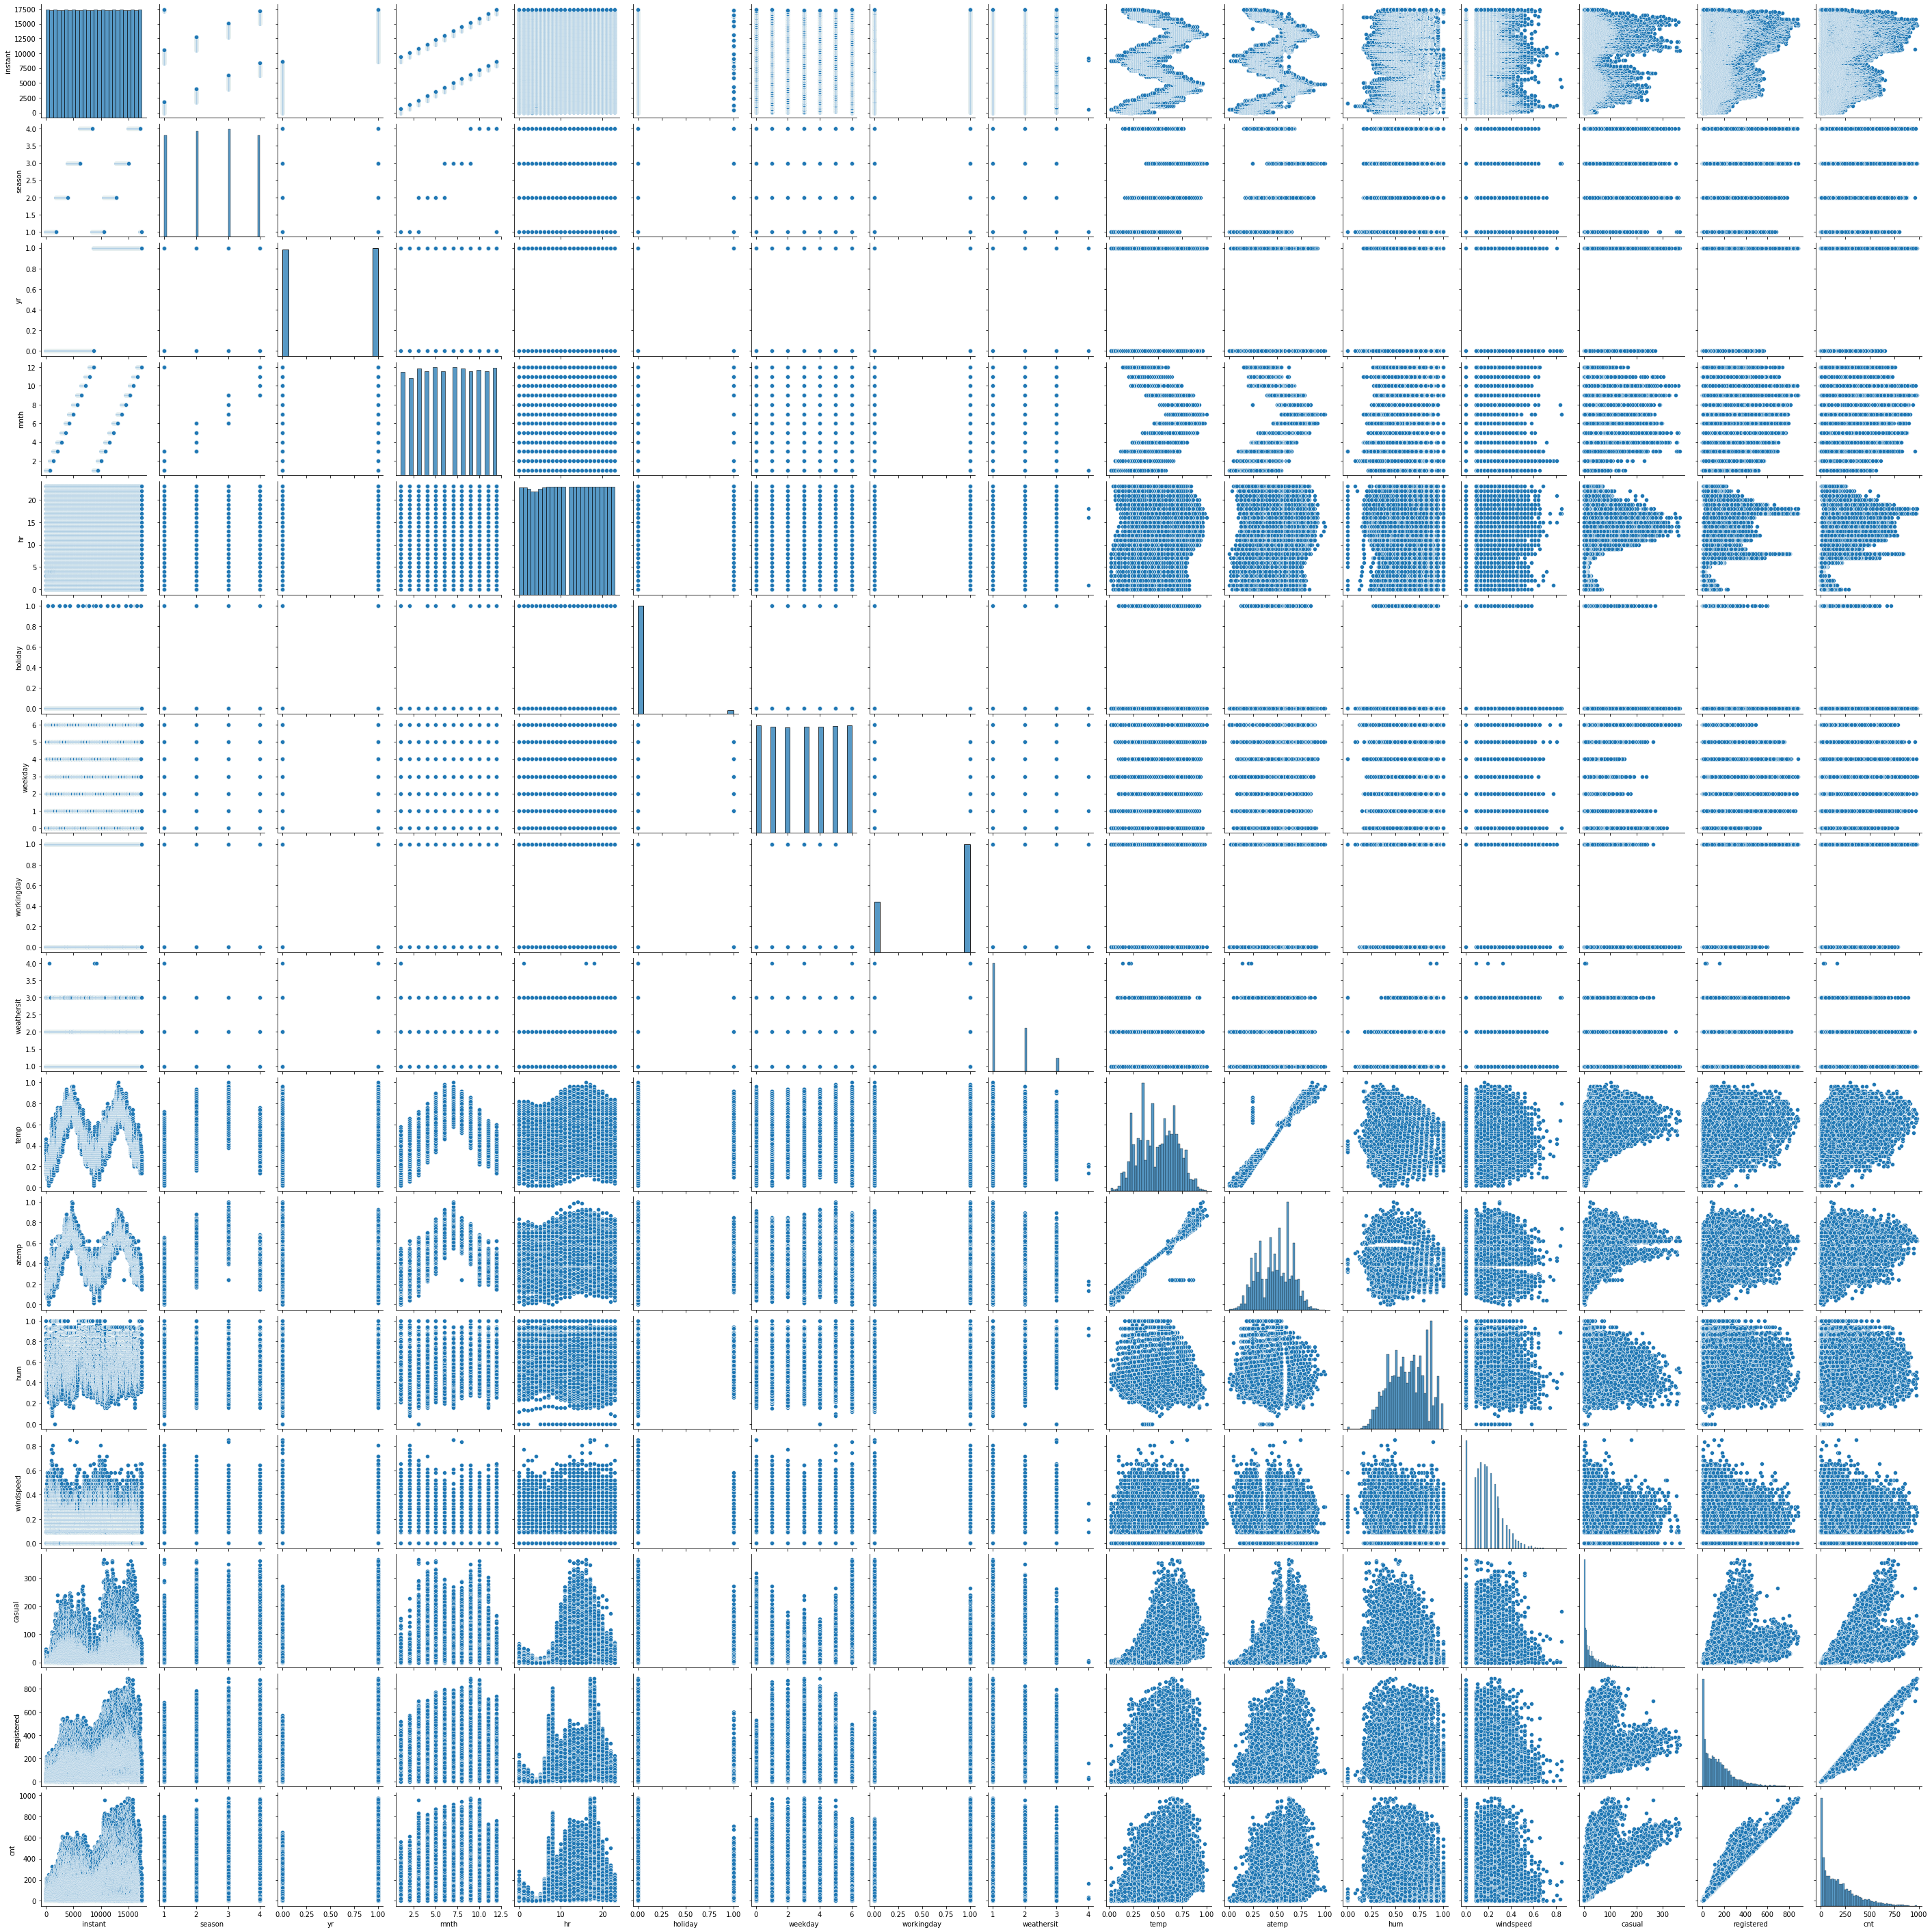

In [5]:
def show_pairPlot(dataframe):
    sns.pairplot(dataframe)

show_pairPlot(df)

# Pair Plot will give you insights about both the relationship and distribution of the variables. 
# Pair Plot is a great technique to identify,the trend to follow up analysis and can easily implement the following code.

# Data Preprocessing

- Data cleaning is the process of preparing data for analysis by removing or modifying data that is incorrect, incomplete, irrelevant, or improperly formatted.
- The most important step in Data Science is Data Cleaning, In End to End Data Science Project, 60% of the work will regarding Data Cleaning.

In [7]:
# Missing Values
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
df.isna().any()

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [9]:
## The Above Code will return this output
df['Year'] = df['dteday'].str.split('-').str[0]
df['Year'] = df['Year'].astype(int)
df['Month'] = df['dteday'].str.split('-').str[1]
df['Month'] = df['Month'].astype(int)
df['Date'] = df['dteday'].str.split('-').str[2]
df['Date'] = df['Date'].astype(int)
print("=======___________________________________________________============")
print("Removing rows, because datetime splitting in different columns")
print("=======___________________________________________________============")
df = df.drop(['dteday'],axis=1)
df = df.drop(['yr'],axis=1)
df = df.drop(['mnth'],axis=1)

=======___________________________________________________============
Removing rows, because datetime splitting in different columns
=======___________________________________________________============


In [10]:
df.head()

,instant,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Year,Month,Date
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011,1,1
1,2,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011,1,1
2,3,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011,1,1
3,4,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011,1,1
4,5,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011,1,1


### Outliers

- Observations in statistics that are removed from the normalized distribution observation in any data set in statistics form the gist of outliers. The most common reasons that outliers occur include an error in measurement or input of the data, corrupt data, and the typical true observation that’s outside the normal distribution. Because of the very nature of datasets in data science, a mathematical definition of an outlier cannot be defined specifically.

###### Outliers Detection

In [11]:
def outlier(x):
    high=0
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3-q1
    low = q1-1.5*iqr
    high += q3+1.5*iqr
    outlier = (x.loc[(x < low) | (x > high)])
    return(outlier)
outlier(df['cnt']).count()
## The Above Code will return this output

505

##### Removal of Outliers

In [12]:
q1 =df['cnt'].quantile(.25)
q3 = df['cnt'].quantile(.75)
iqr = q3-q1
df_new = df[~((df['cnt'] < (q1 - 1.5 *iqr))  |  (df['cnt'] > (q3+ 1.5 * iqr)))]

In [14]:
df_new

,instant,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Year,Month,Date
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,2011,1,1
1,2,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,2011,1,1
2,3,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,2011,1,1
3,4,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,2011,1,1
4,5,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,2011,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,2012,12,31
17375,17376,1,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,2012,12,31
17376,17377,1,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,2012,12,31
17377,17378,1,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,2012,12,31


In [ ]:
#### removed Outlier rows 
# 17379 - 79 = rows from dataset

# Basic Statistical Normality Test

In [15]:
from scipy.stats import anderson
print('Anderson Darling Test :: ',anderson(df['cnt']))
print('==============================================================================')
from scipy.stats import shapiro
print('Shapiro Wilk Test :: ',shapiro(df['cnt']))
print('===============================================================================')
from scipy.stats import kstest
print('Kolmogorov–Smirnov Test :: ',kstest(df['cnt'],'norm'))
print('================================================================================')

Anderson Darling Test ::  AndersonResult(statistic=598.7079002142455, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Shapiro Wilk Test ::  ShapiroResult(statistic=0.8734650015830994, pvalue=0.0)
Kolmogorov–Smirnov Test ::  KstestResult(statistic=0.9775902020892054, pvalue=0.0)


# 4. Feature Engineering

- need for feature engineering arises. I think feature engineering efforts mainly have two goals:

    - 1- Preparing the proper input dataset, compatible with the machine learning algorithm requirements.
    - 2- Improving the performance of machine learning models.

[Check PowerTransform tutorials here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html)

In [16]:
from scipy import stats
import pylab
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True,) 
df = pt.fit_transform(df)
df = pd.DataFrame(df)
df=df.rename(columns = {0:'Intent',1:'Season',2:'hr',3:"holiday",4:"Weekday",5:"Workingday",6:"Weathersit",7:"hum",8:"Windspeed",9:"registered",10:"cnt",11:"year",12:"Month",13:"Date",14:"atemp",15:"Temp",16:"Cacual"})
df
## The Above Code will return this output

,Intent,Season,hr,holiday,Weekday,Workingday,Weathersit,hum,Windspeed,registered,cnt,year,Month,Date,atemp,Temp,Cacual
0,-2.190524,-1.399107,-1.902877,-0.172112,1.399855,-1.46690,-0.720808,-1.341502,-1.092321,0.947780,-1.770094,-0.906359,-1.261875,-1.252934,-1.005134,-1.733283,-1.891341
1,-2.188491,-1.399107,-1.658943,-0.172112,1.399855,-1.46690,-0.720808,-1.448199,-1.178011,0.894063,-1.770094,-0.396991,-0.804152,-0.791386,-1.005134,-1.733283,-1.891341
2,-2.186651,-1.399107,-1.446865,-0.172112,1.399855,-1.46690,-0.720808,-1.448199,-1.178011,0.894063,-1.770094,-0.655811,-0.900775,-0.916496,-1.005134,-1.733283,-1.891341
3,-2.184942,-1.399107,-1.253144,-0.172112,1.399855,-1.46690,-0.720808,-1.341502,-1.092321,0.626898,-1.770094,-0.906359,-1.371624,-1.339644,-1.005134,-1.733283,-1.891341
4,-2.183331,-1.399107,-1.072020,-0.172112,1.399855,-1.46690,-0.720808,-1.341502,-1.092321,0.626898,-1.770094,-1.704042,-1.964542,-1.983013,-1.005134,-1.733283,-1.891341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1.553528,-1.399107,1.046188,-0.172112,-0.973769,0.68171,1.304525,-1.235049,-1.262896,-0.160037,-0.122211,-0.208191,0.053508,-0.040308,0.994892,1.499635,1.597418
17375,1.553680,-1.399107,1.167163,-0.172112,-0.973769,0.68171,1.304525,-1.235049,-1.262896,-0.160037,-0.122211,-0.396991,-0.178165,-0.265252,0.994892,1.499635,1.597418
17376,1.553833,-1.399107,1.286616,-0.172112,-0.973769,0.68171,-0.720808,-1.235049,-1.262896,-0.160037,-0.122211,-0.473044,-0.159274,-0.256958,0.994892,1.499635,1.597418
17377,1.553986,-1.399107,1.404635,-0.172112,-0.973769,0.68171,-0.720808,-1.235049,-1.178011,-0.366074,-0.388138,-0.105220,-0.552177,-0.529789,0.994892,1.499635,1.597418


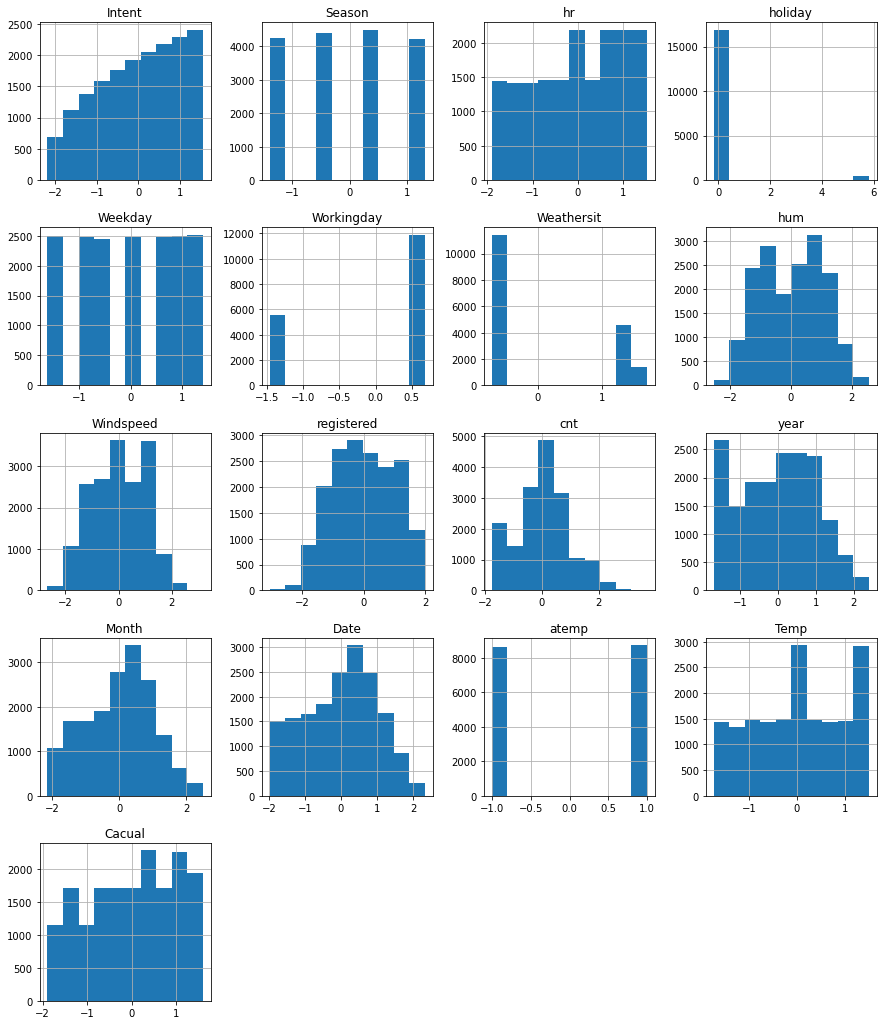

In [17]:
# now check the normal distribution

def show_hist(x):
    plt.rcParams["figure.figsize"] = 15,18
    x.hist()
show_hist(df)
## The Above Code will return this output

**In the above Histogram you can able to see major normality differences when compared to the Histogram we plotted with raw data. Hence as I said Sometimes Transformations will work sometimes may not, it depends on the nature of the data. Because of using Transformation method Feature Scaling is not required here, if we want to do there no issues about that, we can proceed.**

# 5. Model Building

- In such cases, the obvious solution is to split the dataset you have into two sets, one for training and the other for testing; and you do this before you start training your model.

In [18]:
x = df.drop(['cnt'],axis=1)
y = df['cnt']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

### Building Statsmodel ideas

In [20]:
import statsmodels.api as sm
model2 =sm.OLS(y_train,x_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.160
Model:                            OLS   Adj. R-squared (uncentered):              0.159
Method:                 Least Squares   F-statistic:                              144.6
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                        0.00
Time:                        09:42:48   Log-Likelihood:                         -16182.
No. Observations:               12165   AIC:                                  3.240e+04
Df Residuals:                   12149   BIC:                                  3.251e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intent         0.0991      0.086      1.158      0.247      -0.069       0.267
Season        -0.0797      0.016     -5.103      0.000      -0.110      -0.049
hr             0.0444      0.011      4.233      0.000       0.024       0.065
holiday       -0.0081      0.009     -0.929      0.353      -0.025       0.009
Weekday       -0.0044      0.008     -0.528      0.597      -0.021       0.012
Workingday    -0.0272      0.010     -2.692      0.007      -0.047      -0.007
Weathersit     0.0993      0.009     10.785      0.000       0.081       0.117
hum            1.4422      0.055     25.994      0.000       1.333       1.551
Windspeed     -1.4676      0.056    -26.423      0.000      -1.577      -1.359
registered    -0.2774      0.010    -26.735      0.000      -0.298      -0.257
year          -0.0064      0.035     -0.183      0.855      -0.074       0.062
Month          0.0709      0.122      0.579      0.562      -0.169       0.311
Date          -0.0252      0.145     -0.174      0.862      -0.309       0.258
atemp         -0.1274      0.074     -1.727      0.084      -0.272       0.017
Temp          -0.0735      0.046     -1.590      0.112      -0.164       0.017
Cacual         0.0038      0.009      0.415      0.678      -0.014       0.022
==============================================================================
Omnibus:                       42.188   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.004
Skew:                          -0.134   Prob(JB):                     4.59e-10
Kurtosis:                       3.116   Cond. No.                         47.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Regression Model

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=0, normalize=False)
LR =lr.fit(x_train,y_train)
LR_Pred = lr.predict(x_test)
LR_Pred

array([ 0.79498872,  0.56811107, -0.18590057, ...,  0.70379923,
       -0.31815468, -0.42988362])

In [23]:
from sklearn import metrics
print('ROOT MEAN ERROR SQUARE data:',np.sqrt(metrics.mean_squared_error(y_test,LR_Pred)))
LR_RMSE = np.sqrt(metrics.mean_squared_error(y_test,LR_Pred))

ROOT MEAN ERROR SQUARE data: 0.9216816574248379


[RSME tutorials link](https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/)

In [25]:
from sklearn.metrics import r2_score
print('R SQUARE:',r2_score(y_test,LR_Pred))
LM_r2_score =r2_score(y_test,LR_Pred)

R SQUARE: 0.1567659239989163


# R2 Square

 R2 score is used to evaluate the performance of a linear regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s)

# Saving data in pickle

In [66]:
import pickle
pickle.dump(lr,open('LinearRegression.pkl','wb'))

# Random Forest Model

In [26]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=1000,random_state=42)
reg=regressor.fit(x_train,y_train)

In [27]:
RF_pred=regressor.predict(x_test)

In [28]:
from sklearn import metrics
RF_RMSE = np.sqrt(metrics.mean_squared_error(y_test,RF_pred))
RF_RMSE

0.6532404580367012

In [29]:
from sklearn.metrics import r2_score
RF_r2_score = r2_score(y_test,RF_pred)
RF_r2_score

0.5764229624193509

In [30]:
 # model save
import pickle
pickle.dump(reg,open('RandomForest.pkl','wb'))

In [31]:
# #x_test.loc[12830]
# y_test.loc[12830]

0.13009461162872402

In [33]:
# # load the model from disk and get the output value
loaded_model = pickle.load(open('RandomForest.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.5764229624193509


In [34]:
x_test.index

Int64Index([12830,  8688,  7091, 12230,   431,  1086, 11605,  7983, 10391,
             7046,
            ...
             4768, 14206,  2115, 11162,  6717, 12749, 11476, 12847, 16721,
             9511],
           dtype='int64', length=5214)

In [38]:
# # load the model from disk
loaded_model = pickle.load(open('RandomForest.pkl', 'rb'))
result = loaded_model.predict([x_test.loc[12830]])
print(result)

[0.50026448]


In [39]:
x_test.loc[12830]

Intent        0.829434
Season        0.485236
hr            1.046188
holiday      -0.172112
Weekday       1.399855
Workingday   -1.466900
Weathersit   -0.720808
hum           1.560222
Windspeed     1.298183
registered   -1.808286
year          1.826578
Month         0.808512
Date          1.211056
atemp         0.994892
Temp         -0.091537
Cacual        0.839469
Name: 12830, dtype: float64

# KNN Regressor Model

In [78]:
from sklearn.neighbors import KNeighborsRegressor
clf = KNeighborsRegressor(n_neighbors = 21,  weights = 'distance', p=1)
reg.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [79]:
KNN_pred = reg.predict(x_test)

In [80]:
from sklearn import metrics
KNN_RMSE = np.sqrt(metrics.mean_squared_error(y_test,KNN_pred))
KNN_RMSE

0.6526560565530014

In [81]:
from sklearn.metrics import r2_score
KNN_r2_score = r2_score(y_test,KNN_pred)
KNN_r2_score

0.5772156625502767

[find R2 tutorials](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

# Desicion Tree

In [86]:
from sklearn.tree import DecisionTreeRegressor
Dtree_reg = DecisionTreeRegressor()
Dtree_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [87]:
Dtree_pred = Dtree_reg.predict(x_test)

In [88]:
from sklearn import metrics
Dtree_RMSE = np.sqrt(metrics.mean_squared_error(y_test,Dtree_pred))
Dtree_RMSE

0.9211591382029966

In [89]:
from sklearn.metrics import r2_score
Dtree_r2_score = r2_score(y_test,Dtree_pred)
Dtree_r2_score

0.15779178266214355

# SVM Regressor Model

In [109]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel='poly')
svr_regressor = regressor.fit(x_train,y_train)

In [110]:
svr_pred  = model.predict(x_test)

In [111]:
from sklearn import metrics
svr_RMSE = np.sqrt(metrics.mean_squared_error(y_test,svr_pred))
svr_RMSE

0.8205547541820184

In [112]:
from sklearn.metrics import r2_score
svr_r2_score = r2_score(y_test,svr_pred)
svr_r2_score

0.33170951617719113

In [116]:
LR_r2_score

NameError: name 'LR_r2_score' is not defined

# Best Model

In [122]:
Best_Model ={'Model':['LinearRegression','RandomForestRegressor',,'KNN Regressor','AdaBoost Regressor','Decision_Tree Regressor','Lgb Regressor','ExtraTree Regressor','SupportVector Regressor'],
        'R2_Score':[LM_r2_score,RF_r2_score,KNN_r2_score,Dtree_r2_score,lgb_r2_score,Extr_r2_score,svr_r2_score],'RMSE':[LR_RMSE,RF_RMSE,KNN_RMSE,Dtree_RMSE,lgb_RMSE,Extr_RMSE,svr_RMSE]}
Best_Model =pd.DataFrame(Best_Model)
Best_Model=Best_Model.set_index('Model')
Best_Model

,R2_Score,RMSE
Model,,
LinearRegression,0.151927,0.924361
RandomForestRegressor,0.577216,0.652656
CatBoost Regressor,0.571831,0.656799
XGBoost Regressor,0.601488,0.633644
KNN Regressor,0.577216,0.652656
AdaBoost Regressor,0.150404,0.925190
Decision_Tree Regressor,0.157792,0.921159
Lgb Regressor,0.331710,0.820555
ExtraTree Regressor,0.331710,0.820555
